In [2]:
#@title TENSORFLOW MULTICLASS CLASSIFICATION

import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

import pathlib
import random

In [1]:
!nvidia-smi


Sat Dec 10 17:08:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2022-12-10 17:08:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.9MB/s    in 22s     

2022-12-10 17:09:01 (22.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
food_class_dir = "10_food_classes_all_data"

In [6]:
for dirpath, dirnames, filenames in os.walk(food_class_dir):
  print(f"There are directories: {len(dirnames)}, with files of : {len(filenames)}, located in path: {dirpath}")

There are directories: 2, with files of : 0, located in path: 10_food_classes_all_data
There are directories: 10, with files of : 0, located in path: 10_food_classes_all_data/test
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/test/grilled_salmon
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/test/hamburger
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/test/chicken_wings
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/test/sushi
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/test/ramen
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/test/ice_cream
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/test/fried_rice
There are directories: 0, with files of : 250, located in path: 10_food_classes_all_data/t

In [7]:
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [8]:
data_dir = pathlib.Path(train_dir)

data_dir

PosixPath('/content/10_food_classes_all_data/train')

In [9]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
def view_random_image(target_dir, target_image):
  target_folder = target_dir + target_image

  #get random image path

  random_image = random.sample(os.listdir(target_folder), 1)

  read_image = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(read_image)
  plt.title(target_image)
  plt.axis("off")

  print(f"Image Shape: {read_image.shape}")

  return read_image

Image Shape: (512, 512, 3)


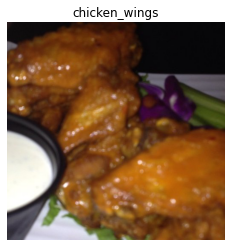

In [12]:
image = view_random_image(target_dir=train_dir, target_image=random.choice(class_names) )

In [13]:
#@title Data Augmentation for multiclass

train_first = ImageDataGenerator(rescale=1/255.)

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
#@title Flow Directory for MultiClass------ *As with binary classifcation, we've creator image generators. The main change this time is that we've changed the class_mode parameter to 'categorical' because we're dealing with 10 classes of food images.*

train_first_ret = train_first.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode= 'categorical'
)

train_data_optimized = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size = 32,
    class_mode= 'categorical'
)

test_data_optimizer = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode = 'categorical'
)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


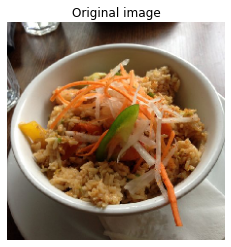

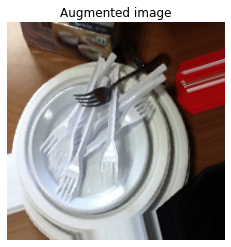

In [15]:
# check augmented images
image_test, label_test = train_first_ret.next()
image, labels = train_data_optimized.next()


# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance

plt.imshow(image_test[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

plt.imshow(image[random_number])
plt.title(f"Augmented image")
plt.axis(False);
     

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3,3), activation = 'relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(10, (3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [18]:
history = model.fit(train_data_optimized , epochs=5, steps_per_epoch=len(train_data_optimized), validation_data=test_data_optimizer, validation_steps=len(test_data_optimizer))

Epoch 1/5
235/235 [==============================] - 127s 497ms/step - loss: 2.2012 - accuracy: 0.1969 - val_loss: 2.0347 - val_accuracy: 0.2656
Epoch 2/5
235/235 [==============================] - 117s 496ms/step - loss: 2.0790 - accuracy: 0.2531 - val_loss: 1.9694 - val_accuracy: 0.3024
Epoch 3/5
235/235 [==============================] - 127s 542ms/step - loss: 2.0259 - accuracy: 0.2717 - val_loss: 1.8628 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 150s 640ms/step - loss: 1.9803 - accuracy: 0.3071 - val_loss: 1.8757 - val_accuracy: 0.3464
Epoch 5/5
235/235 [==============================] - 144s 614ms/step - loss: 1.9496 - accuracy: 0.3199 - val_loss: 1.8829 - val_accuracy: 0.3420


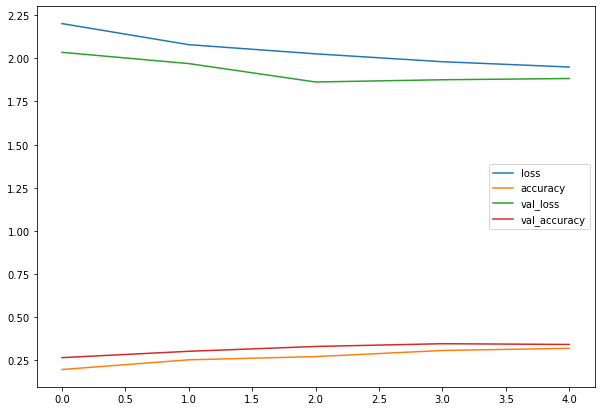

In [21]:

# Plot the training curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [27]:
def show_metrics(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']


  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.legend()

  plt.figure()

  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
 


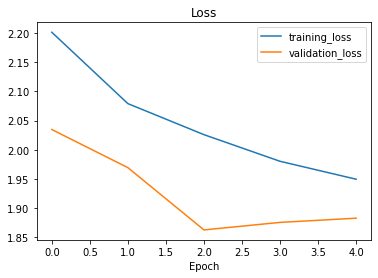

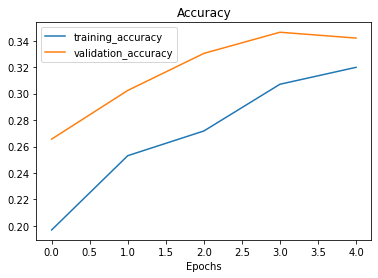

In [28]:
show_metrics(history)

In [29]:
model.evaluate(test_data_optimizer)

79/79 [==============================] - 11s 138ms/step - loss: 1.8829 - accuracy: 0.3420


[1.8829002380371094, 0.34200000762939453]

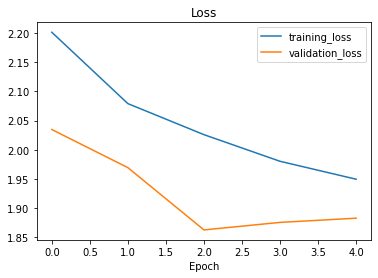

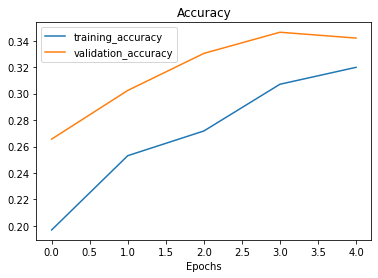

In [30]:
show_metrics(history)

In [31]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [32]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [43]:
#@title read and predict on raw image

def read_predict(filename,image_shape=224):
 
  #read filename
  image_raw = tf.io.read_file(filename)

  # decode 
  decoded_image = tf.io.decode_image(image_raw, channels=3)
  
  #resize
  resized_image = tf.image.resize(decoded_image, size=[image_shape, image_shape])

  #expand dimensipn

  expand_img_dim = tf.expand_dims(resized_image, axis=0)

  #rescale
  rescaled_img = expand_img_dim/255.

  return rescaled_img




In [44]:
pizza_dad = read_predict("03-steak.jpeg")

In [45]:
pizza_dad.shape

TensorShape([1, 224, 224, 3])

(-0.5, 3023.5, 4031.5, -0.5)

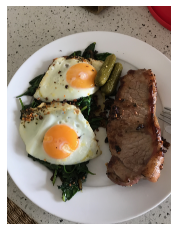

In [48]:
pizza = mpimg.imread("03-steak.jpeg" )
plt.imshow(pizza)
plt.axis(False)

In [50]:
preds = model.predict(pizza_dad)

1/1 [==============================] - 0s 16ms/step


In [51]:
#@title PREDICTION OF STEAK
class_names[preds.argmax()]

'steak'

In [59]:
#@title PREDICTION OF **03-hamburger**

HAMBURG = read_predict("03-hamburger.jpeg")
HAMBURG.shape

TensorShape([1, 224, 224, 3])

(-0.5, 5999.5, 3999.5, -0.5)

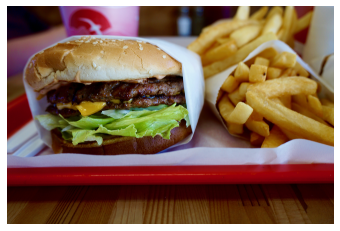

In [55]:
ham = mpimg.imread("03-hamburger.jpeg")
plt.imshow(ham)
plt.axis(False)

In [60]:
preds_ham = model.predict(HAMBURG)

class_names[preds_ham.argmax()]

1/1 [==============================] - 0s 16ms/step


'pizza'

In [63]:

susi = read_predict("03-sushi.jpeg")
pred_susi = model.predict(susi)

class_names[pred_susi.argmax()]

1/1 [==============================] - 0s 16ms/step


'chicken_curry'

(-0.5, 4031.5, 3023.5, -0.5)

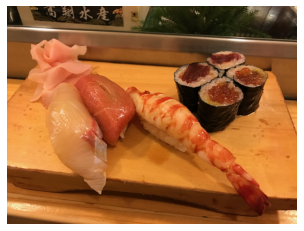

In [64]:
ham = mpimg.imread("03-sushi.jpeg")
plt.imshow(ham)
plt.axis(False)

In [66]:
#@title SAVE DATA
model.save("multiclass_modelpretrained.h5")

In [68]:
load_model = tf.keras.models.load_model("multiclass_modelpretrained.h5")

load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [69]:
load_model.evaluate(test_data_optimizer)

79/79 [==============================] - 11s 137ms/step - loss: 1.8829 - accuracy: 0.3420


[1.882900357246399, 0.34200000762939453]